In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/kyphosis.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.isnull().sum()

,0
Kyphosis,0
Age,0
Number,0
Start,0


In [ ]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Kyphosis': ['absent' 'present']
Unique values in column 'Age': [ 71 158 128   2   1  61  37 113  59  82 148  18 168  78 175  80  27  22
 105  96 131  15   9   8 100   4 151  31 125 130 112 140  93  52  20  91
  73  35 143  97 139 136 121 177  68  72 120  51 102 114  81 118  17 195
 159 127  87 206  11 178 157  26  42  36]
Unique values in column 'Number': [ 3  4  5  2  6  7  9 10]
Unique values in column 'Start': [ 5 14  1 15 16 17 12  2 18 13  9  3  6 11 10  8]


In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.shape

(81, 4)

In [ ]:
#
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Kyphosis'],axis=1)
y = df['Kyphosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, stratify=y, random_state=33)

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
x_train.shape, x_test.shape

((60, 3), (21, 3))

In [ ]:
y_train.shape, y_test.shape

((60,), (21,))

In [ ]:
# model training
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, stratify=y, random_state=33)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56, 3), (25, 3), (56,), (25,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_sc = StandardScaler()

In [ ]:
x_train = std_sc.fit_transform(x_train)

In [ ]:
x_test = std_sc.transform(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56, 3), (25, 3), (56,), (25,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# EVALUATE TRAINED MODEL PERFORMANCE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred_train = model.predict(x_train)

In [ ]:
# Condusion Matrix
cm = confusion_matrix(y_train, y_pred_train)

In [ ]:
print(cm)

[[42  2]
 [ 7  5]]


In [ ]:
import seaborn as sns

<Axes: >

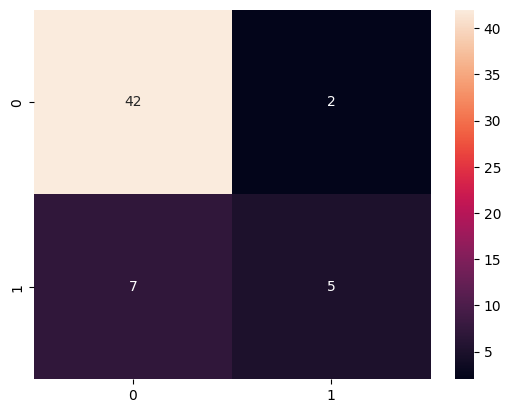

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
# Classification Report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        44
     present       0.71      0.42      0.53        12

    accuracy                           0.84        56
   macro avg       0.79      0.69      0.71        56
weighted avg       0.83      0.84      0.82        56



In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

0.8392857142857143
